# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = os.path.join("..","output","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


635

###  API Calls



In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Get latitude and temperature for cities
cities = cities[0:len(cities)]

#set up lists to hold reponse info
#we need more data than latitude and temp for the hw 
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
lng = []
cities_list = []
country_code = []
counter = 0
set_list = 1
t = 10

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    counter += 1
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response["dt"])
        country_code.append(response['sys']['country'])
        cities_list.append(city)
        print(f'Processing Record {counter} of Set {set_list} | {city}')
    except KeyError:
        print("This city does not exist")
        pass
    
    if counter >= 50:
        time.sleep(t)
        counter = 0
        set_list += 1
        print(f'The program paused for {t} seconds')

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | kangaba
Processing Record 5 of Set 1 | kalat
This city does not exist
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | vostok
Processing Record 10 of Set 1 | chernenko
Processing Record 11 of Set 1 | sidi ali
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | lazarev
Processing Record 14 of Set 1 | det udom
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | baker city
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | coldingham
Processing Record 19 of Set 1 | pinawa
Processing Record 20 of Set 1 | cape town
This city does not exist
Processing Record 22 of Set 1 | kortkeros
Processing Record 23 of Set 1 | kapaa
Processing Record 24 of Set 1 | bengkulu
Processing Record 25 of Set 1 | luderitz
Processing Record 26 o

This city does not exist
This city does not exist
Processing Record 6 of Set 5 | cogon
This city does not exist
Processing Record 8 of Set 5 | keti bandar
Processing Record 9 of Set 5 | harwich
Processing Record 10 of Set 5 | sibu
This city does not exist
Processing Record 12 of Set 5 | grand gaube
Processing Record 13 of Set 5 | omsukchan
Processing Record 14 of Set 5 | bekobod
Processing Record 15 of Set 5 | slave lake
Processing Record 16 of Set 5 | russell
Processing Record 17 of Set 5 | gizo
Processing Record 18 of Set 5 | poli
Processing Record 19 of Set 5 | tevaitoa
Processing Record 20 of Set 5 | carbonia
Processing Record 21 of Set 5 | chake chake
Processing Record 22 of Set 5 | saint george
Processing Record 23 of Set 5 | makakilo city
Processing Record 24 of Set 5 | kontagora
Processing Record 25 of Set 5 | nanortalik
Processing Record 26 of Set 5 | wenling
Processing Record 27 of Set 5 | severo-kurilsk
Processing Record 28 of Set 5 | riberalta
Processing Record 29 of Set 5 

Processing Record 9 of Set 9 | sangar
This city does not exist
Processing Record 11 of Set 9 | lorengau
Processing Record 12 of Set 9 | media luna
Processing Record 13 of Set 9 | adre
Processing Record 14 of Set 9 | snasa
Processing Record 15 of Set 9 | flinders
Processing Record 16 of Set 9 | balikpapan
Processing Record 17 of Set 9 | padang
Processing Record 18 of Set 9 | san jose de ocoa
Processing Record 19 of Set 9 | avera
Processing Record 20 of Set 9 | kigoma
Processing Record 21 of Set 9 | chapais
Processing Record 22 of Set 9 | pacora
Processing Record 23 of Set 9 | pyay
Processing Record 24 of Set 9 | asfi
Processing Record 25 of Set 9 | saldanha
Processing Record 26 of Set 9 | bonthe
Processing Record 27 of Set 9 | marsh harbour
Processing Record 28 of Set 9 | broken hill
Processing Record 29 of Set 9 | bakel
This city does not exist
Processing Record 31 of Set 9 | midland
Processing Record 32 of Set 9 | miraflores
Processing Record 33 of Set 9 | araguacu
Processing Record 3

Processing Record 13 of Set 13 | paamiut
Processing Record 14 of Set 13 | lima
Processing Record 15 of Set 13 | pevek
Processing Record 16 of Set 13 | altay
Processing Record 17 of Set 13 | kenai
Processing Record 18 of Set 13 | shatsk
Processing Record 19 of Set 13 | rawson
Processing Record 20 of Set 13 | miloslavskoye
Processing Record 21 of Set 13 | kaka
Processing Record 22 of Set 13 | nucet
Processing Record 23 of Set 13 | soubre
This city does not exist
Processing Record 25 of Set 13 | rocha
Processing Record 26 of Set 13 | shiyan
Processing Record 27 of Set 13 | loei
Processing Record 28 of Set 13 | khash
Processing Record 29 of Set 13 | boende
Processing Record 30 of Set 13 | rassvet
Processing Record 31 of Set 13 | yazman
Processing Record 32 of Set 13 | sonoita
Processing Record 33 of Set 13 | toro
Processing Record 34 of Set 13 | dudinka
Processing Record 35 of Set 13 | juneau


In [6]:
print(len(cities_list), len(temp), len(humidity),len(cloudiness), len(lat), len(date), len(wind_speed),len(country_code))

585 585 585 585 585 585 585 585


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
import datetime
city_data = pd.DataFrame({"City Name":cities_list,"Country Code":country_code,"Date (UTC)":date,"Latitude":lat, "Longitude":lng,"Temperature (F)":temp,"Humidity (%)":humidity,"Cloudiness (%)":cloudiness,"Wind Speed (MPH)":wind_speed})
city_data["City Name"] = [city.title() for city in city_data["City Name"]]
city_data["Date (UTC)"] = [datetime.datetime.utcfromtimestamp(date) for date in city_data["Date (UTC)"]]
city_data.to_csv(output_file)
city_data

,City Name,Country Code,Date (UTC),Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Avarua,CK,2020-04-12 01:18:41,-21.21,-159.78,84.20,89,96,5.82
1,Hasaki,JP,2020-04-12 01:18:53,35.73,140.83,54.34,76,75,11.41
2,Puerto Ayora,EC,2020-04-12 01:18:53,-0.74,-90.35,80.87,74,75,11.41
3,Kangaba,ML,2020-04-12 01:18:53,11.93,-8.42,85.75,39,99,4.12
4,Kalat,PK,2020-04-12 01:18:53,29.02,66.59,59.18,26,48,4.65
...,...,...,...,...,...,...,...,...,...
580,Yazman,PK,2020-04-12 01:21:29,29.12,71.74,83.37,30,80,2.15
581,Sonoita,MX,2020-04-12 01:21:29,31.85,-112.83,62.01,53,81,10.36
582,Toro,CO,2020-04-12 01:21:29,4.61,-76.08,70.61,68,73,2.51
583,Dudinka,RU,2020-04-12 01:20:13,69.41,86.18,33.80,98,75,33.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

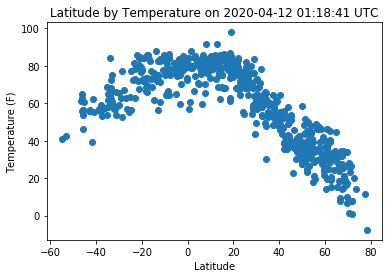

In [8]:
city_lat = city_data["Latitude"]
city_temp = city_data["Temperature (F)"]
city_date = city_data["Date (UTC)"]

plt.scatter(city_lat,city_temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude by Temperature on {city_date[0]} UTC")
plt.savefig("../output/Lat_Temp_fig.png")
plt.show()

### Interpretation
The scatterplot above is visualizing the change in temperature based on latitude. The scatterplot depicts a 
maximum temperature around latitude 0, the equator. Temperature rises as latitude increases towards 0. Temperature 
decreases as latitude increases away from 0. 

#### Latitude vs. Humidity Plot

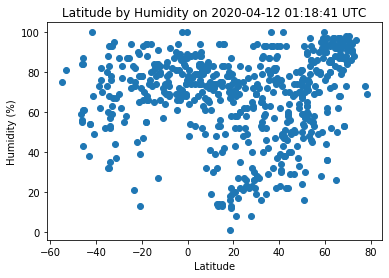

In [10]:
city_humidity = city_data["Humidity (%)"]

plt.scatter(city_lat,city_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude by Humidity on {city_date[0]} UTC")
plt.savefig("../output/Lat_Hum_fig.png")
plt.show()

## Interpretation
The scatterplot above is visualzing the percent humidity in cities based on latitude. Qualitatively, the plot does
not seem to show a relationship. 

#### Latitude vs. Cloudiness Plot

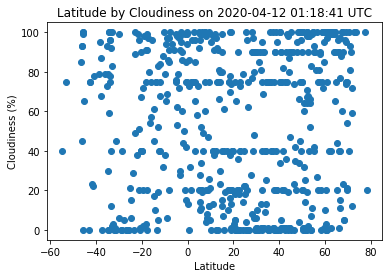

In [12]:
city_cloudiness = city_data["Cloudiness (%)"]

plt.scatter(city_lat,city_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude by Cloudiness on {city_date[0]} UTC")
plt.savefig("../output/Lat_Cloud_fig.png")
plt.show()

## Interpretation
The scatterplot above is visualzing the percent cloudiness in cities based on latitude. Qualitatively, the plot does not seem to show a relationship. 

#### Latitude vs. Wind Speed Plot

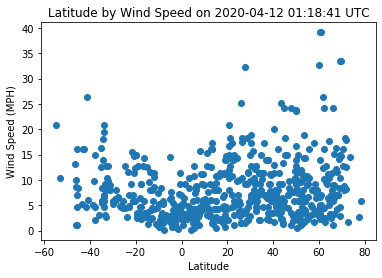

In [14]:
city_windspeed = city_data["Wind Speed (MPH)"]

plt.scatter(city_lat,city_windspeed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title(f"Latitude by Wind Speed on {city_date[0]} UTC")
plt.savefig("../output/Lat_Wind_fig.png")
plt.show()

# Interpretation
The scatterplot above is visualzing the percent cloudiness in cities based on latitude. It looks as though, wind speed is clustered between ~10 MPH and 0 MPH regardless of latitude. 

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemp = city_data.loc[city_data["Latitude"]>=0,:]
Southern_hemp = city_data.loc[city_data["Latitude"]<0,:]

#Creating series for variables in the northern hemisphere
Northern_city_lat = Northern_hemp["Latitude"]
Northern_city_temp = Northern_hemp["Temperature (F)"]
Northern_city_hum = Northern_hemp["Humidity (%)"]
Northern_city_cloud = Northern_hemp["Cloudiness (%)"]
Northern_city_wind = Northern_hemp["Wind Speed (MPH)"]

#Creating series for variables in the southern hemisphere
Southern_city_lat = Southern_hemp["Latitude"]
Southern_city_temp = Southern_hemp["Temperature (F)"]
Southern_city_hum = Southern_hemp["Humidity (%)"]
Southern_city_cloud = Southern_hemp["Cloudiness (%)"]
Southern_city_wind = Southern_hemp["Wind Speed (MPH)"]


In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearregression(x_values,y_values,x_label,y_label,x_annotate,y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(min(x_values)-2,max(x_values)+2)
    plt.ylim(min(y_values)-2,max(y_values)+2)
    if x_annotate >= 0:
        hemisphere_name = "Northern"
    else:
        hemisphere_name = "Southern"
    plt.title(f'{x_label} vs. {y_label} in the {hemisphere_name} Hemisphere')
    print(f"The r-squared is: {round(rvalue**2,2)}")
    print(line_eq)
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.85
y = -0.99x + 90.77


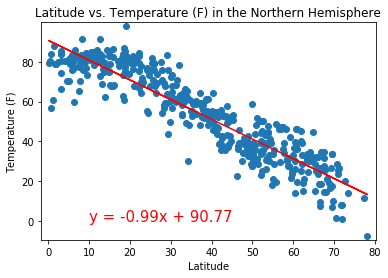

In [34]:
linearregression(Northern_city_lat,Northern_city_temp,"Latitude","Temperature (F)",10,0)

## Interpretation
This linear regression is quantitively describing the relationship between temperature and latitude in the 
northern hemisphere. The linear regression's Pearson's correlation coefficient of .85 represents a strong relationship between the variables. Because the slope of the regression line is ~(-1) we can say that as latitude increases (away from the equator), temperature decreases at a 1:1 relationship. Based on the y-intercept, the linear regression estimates that at the equator, temperature will be 90.77 degrees F. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.53
y = 0.57x + 82.47


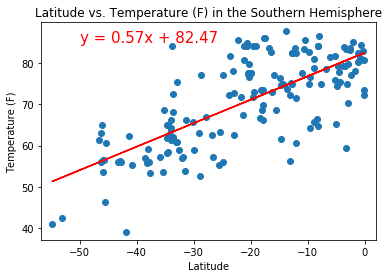

In [35]:
linearregression(Southern_city_lat,Southern_city_temp,"Latitude", "Temperature (F)",-50,85)


## Interpretation
This linear regression is quantitively describing the relationship between temperature and latitude in the 
southern hemisphere. The linear regressions Pearson's correlation coefficient represents a moderate relationship (.53). Because the slope of the regression line is ~.5 we can say that as latitude increases (towards the equator), temperature increases at a 1:.5 relationship. That is, an increase in one latitude point will result in an increase of half of a degree in temperature fahrenheit. Based on the y-intercept, the linear regression estimates that at the equator, temperature will be 82.47 degrees F. It is interesting that the correlation coefficient of temperature vs latitude in the northern hemisphere was much stronger (.85) then the one displayed here. This is likely due to other variables affecting temperature in cities in the northern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06
y = 0.27x + 55.36


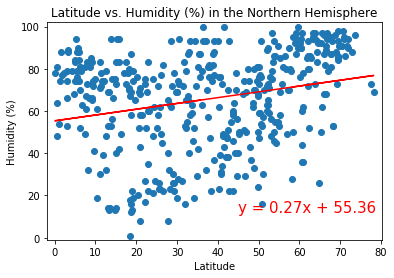

In [22]:
linearregression(Northern_city_lat,Northern_city_hum,"Latitude","Humidity (%)",45,12)

## Interpretation
This linear regression is quantitively describing the relationship between humidity and latitude in the 
northern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be,the slope of the linear regression model is positive; as latitude increases away from the equator, humidity increases. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08
y = 0.33x + 79.28


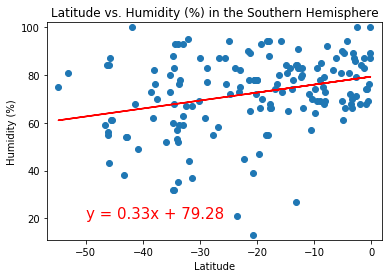

In [24]:
linearregression(Southern_city_lat,Southern_city_hum,"Latitude","Humidity (%)",-50,20)

## Interpretation
This linear regression is quantitively describing the relationship between humidity and latitude in the 
southern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be, the slope of the linear regression model is positive; as latitude increases towards the equator, humidity increases. Based on this data, humidity does not seem to act in the same way across the equator like temperature behaves.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03
y = 0.33x + 39.96


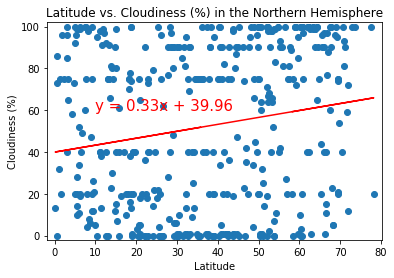

In [26]:
linearregression(Northern_city_lat,Northern_city_cloud,"Latitude","Cloudiness (%)",10,60)

## Interpretation
This linear regression is quantitively describing the relationship between cloudiness and latitude in the 
northern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be, the slope of the linear regression model is positive; as latitude increases away from the equator, cloudiness increases. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02
y = 0.37x + 65.32


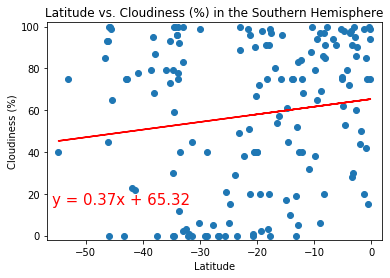

In [36]:
linearregression(Southern_city_lat,Southern_city_cloud,"Latitude","Cloudiness (%)",-56,15)

## Interpretation
This linear regression is quantitively describing the relationship between cloudiness and latitude in the 
southern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be, the slope of the linear regression model is positive; as latitude increases away from 
the equator, cloudiness increases.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04
y = 0.06x + 6.12


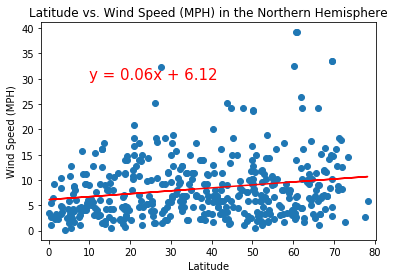

In [30]:
linearregression(Northern_city_lat,Northern_city_wind,"Latitude","Wind Speed (MPH)",10,30)

## Interpretation
This linear regression is quantitively describing the relationship between windspeed and latitude in the 
northern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be,it does appear that wind speed is clustering between ~10 MPH and 0 MPH which was previously described on the global scatter plot. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16
y = -0.14x + 4.16


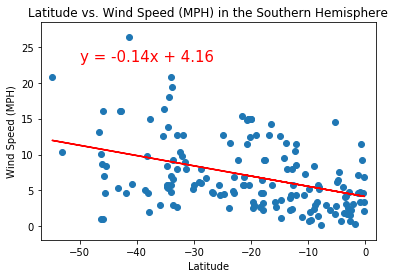

In [32]:
linearregression(Southern_city_lat,Southern_city_wind,"Latitude","Wind Speed (MPH)",-50,23)

## Interpretation
This linear regression is quantitively describing the relationship between windspeed and latitude in the 
southern hemisphere. Based on the r-squared value, we can qualify this relationship as very weak or does not exist. If the relationship does exist, as small as it may be, the slope of the linear regression is negative, describing that as latitude increases, towards the equator, wind speed decreases. 
